# Loan Data Exploration
## by: Seni Kamara
## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others (Udacity, DAND, 2019).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
# Read data from file into DF ld
ld = pd.read_csv('/Users/senkampro/Documents/DATA_SCIENCE/DAND/PROJECT_5/PROJECT_5.5/prosperLoanData.csv')
ld.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Looking at the overall shape of the DF
ld.shape

(113937, 81)

In [5]:
# Looking at the structure of the dataset
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Need to convert DF to Excel for visual assessment
from pandas import ExcelWriter

ld_300 = ld.head(300)

writer = ExcelWriter('LoanData.xlsx')
ld_300.to_excel(writer)
writer.save()

## ASSESS

### Exploratory Analysis of: "Loan Data from Prosper" - `ldp` table

 ###### Data Overview:
 
Loan Data from Prosper:

This data set contains 113,937 loans with 81 variables on each loan.


 


 ###### After doing some programmatic assessment:
 
- dtypes: bool(3), float64(50), int64(11), object(17)
- memory usage: 68.1+ MB
- RangeIndex: 113937 entries, 0 to 113936
- Data columns (total 81 columns)

- This information was very valuable for understanding which variables are "qualitative" and which are "quantitative". That inturn dictates which plot we're going to use for their exploration.



### What is the structure of your dataset?

> Originally the dataset was in csv format. After import into the Jupyter notebook using pandas library, its pandas Data Frame with categorical and numerical variables as columns: int, string, float.

Example:

There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

(worst) ——> (best) 
cut: Fair, Good, Very Good, Premium, Ideal 
color: J, I, H, G, F, E, D 
clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF



### The main features of interest in my dataset are:

> How the borrower's terms affect the loan terms?

> What's the most frequent purpose for a loan?

> What affects the borrower’s APR or interest rate?

> What factors affect a loan’s outcome status?

> Is there a relationship beteween employment, income, property ownership and the loan amount?

> Are there differences between loans depending on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 ###### After doing some visual assessment:

Decided to group and specify variables that I think will help support my investigation into my feature of interest:

> Loan parameters

- <font color="#007ff">ListingCategory (numeric)</font>
- <font color="#00CC5E">LoanStatus</font> 
- <font color="#007ff">Term</font> 
- <font color="#007ff">LoanOriginalAmount</font>
- <font color="#007ff">BorrowerAPR</font> 
- BorrowerRate
- <font color="#007ff">MonthlyLoanPayment</font>
- LoanOriginationDate
- ClosedDate 

> Borrower’s parameters

- BorrowerState 
- <font color="#00CC5E">Occupation</font> 
- <font color="#00CC5E">EmploymentStatus</font> 
- <font color="#007ff">EmploymentStatusDuration</font> 
- <font color="#00CC5E">IsBorrowerHomeowner</font> 
- <font color="#007ff">CreditScoreRangeUpper</font> 
- <font color="#007ff">CreditScoreRangeLower</font> 

> > Income
- <font color="#007ff">DebtToIncomeRatio</font> 
- <font color="#00CC5E">IncomeRange</font> 
- <font color="#00CC5E">IncomeVerifiable</font> 
- <font color="#007ff">StatedMonthlyIncome</font> 


> Borrower’s relationship with Prosper Loans

- TotalProsperLoans 
- <font color="#007ff">TotalProsperPaymentsBilled</font> 
- OnTimeProsperPayments 
- <font color="#007ff">ProsperPrincipalBorrowed</font> 
- ProsperPrincipalOutstanding 



> Group of variables may be affecting the loan terms


- CurrentDelinquencies
- AmountDelinquent 
- DelinquenciesLast7Years
- EmploymentStatus 
- EmploymentStatusDuration 
- IsBorrowerHomeowner 
- CreditScoreRangeUpper 
- CreditScoreRangeLower
- DebtToIncomeRatio 
- IncomeRange 
- IncomeVerifiable 
- StatedMonthlyIncome
- TotalProsperLoans 
- TotalProsperPaymentsBilled 
- OnTimeProsperPayments


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

###### Starting exploration with `Borrowers parameters`, qualitative variables

##### Define
- Going to use Barcharts to explore qualitative variable: `Occupation`

##### Code


In [7]:
# Checking for the different values in the LoanStatus column
#ld.Occupation.value_counts()

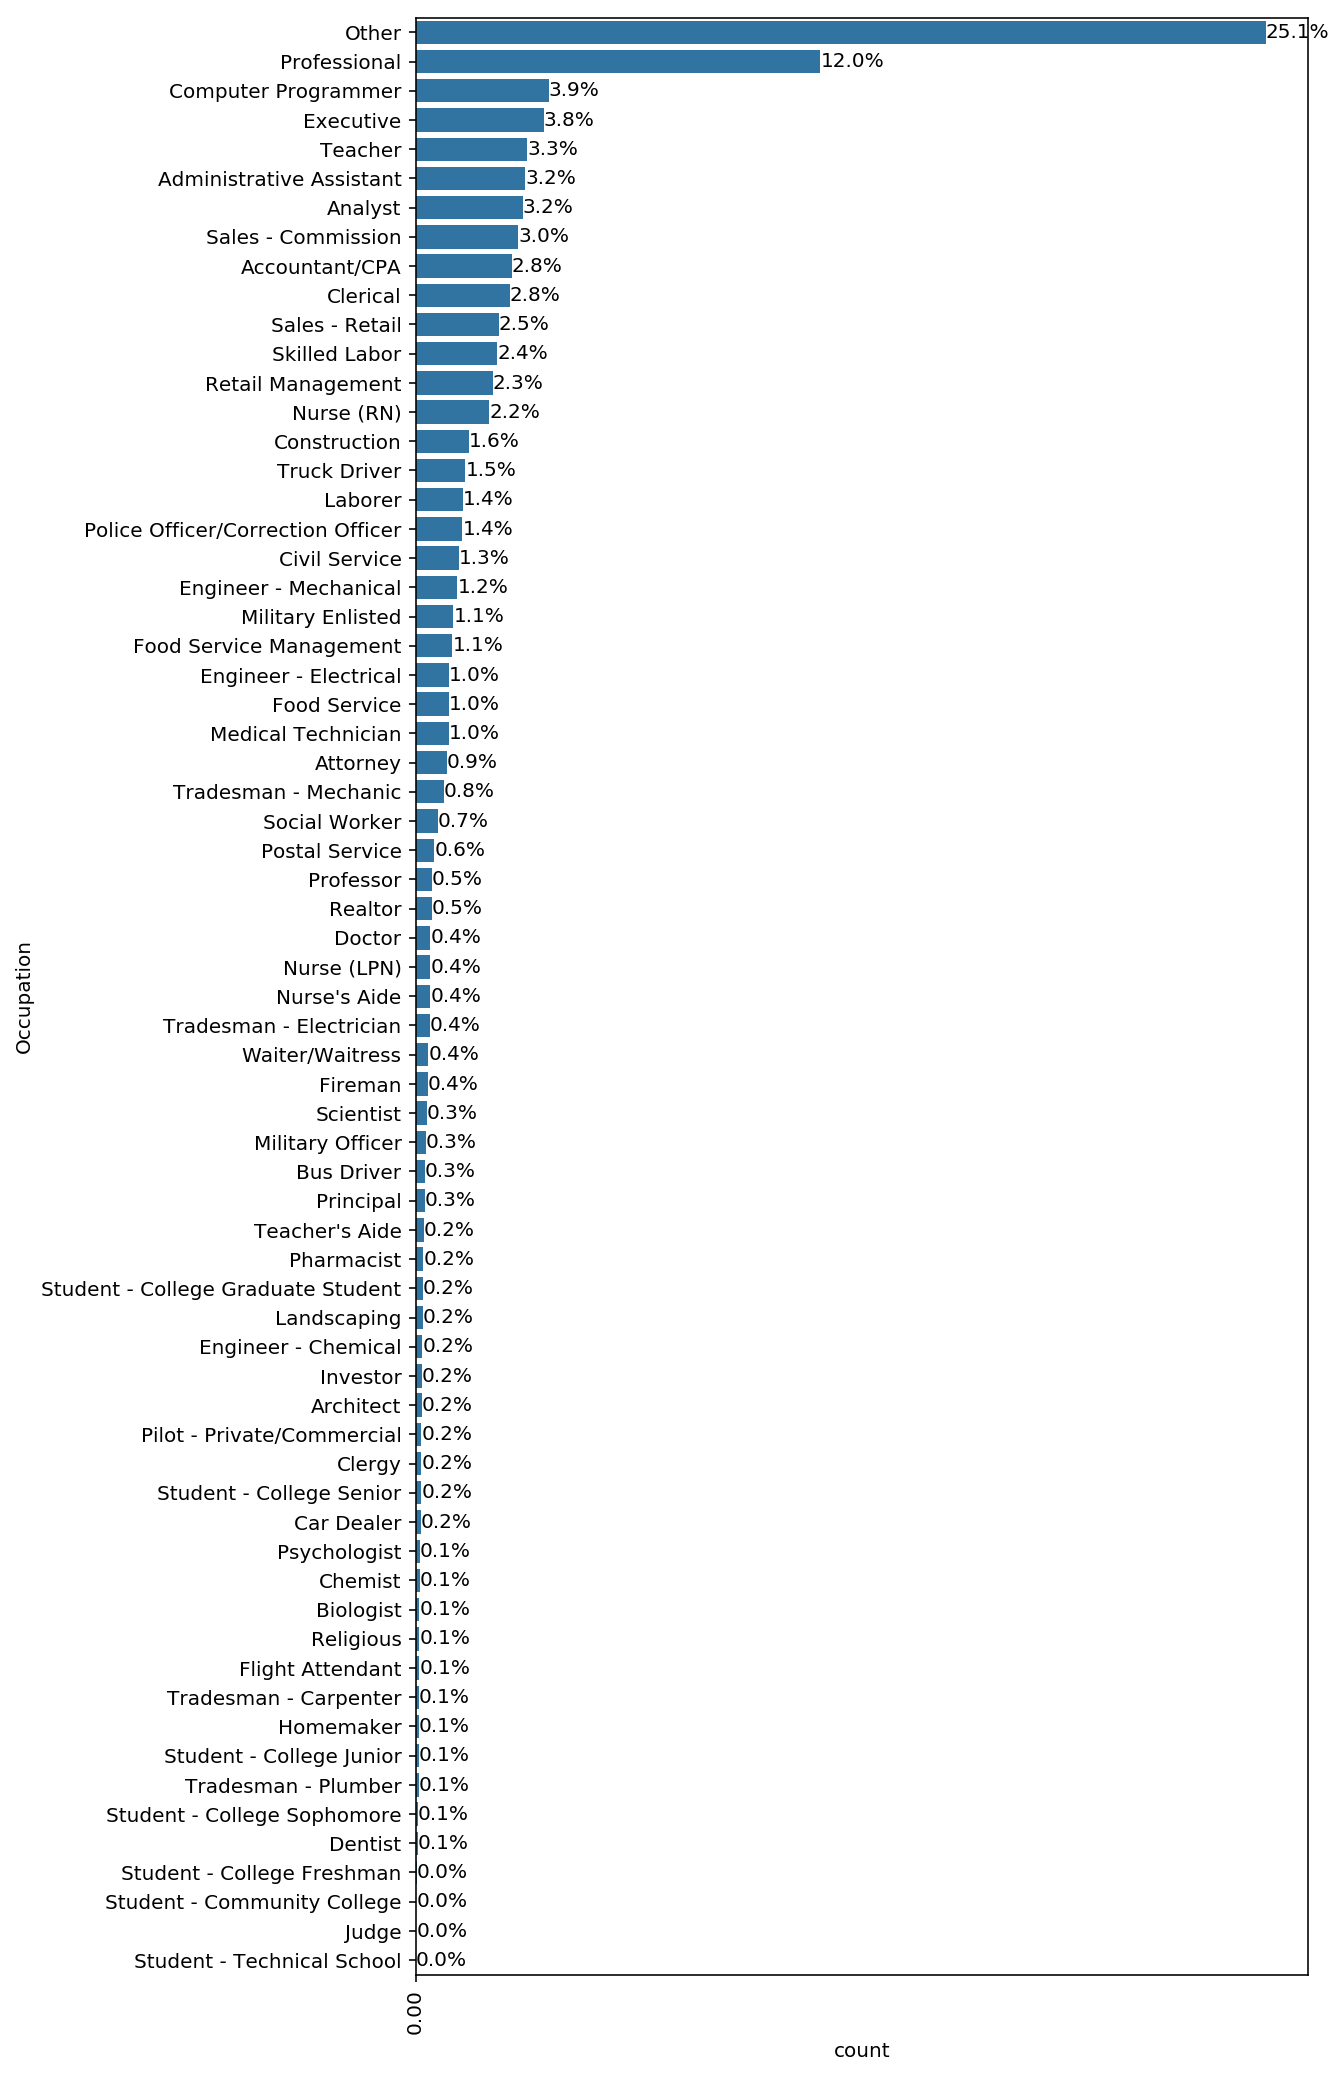

In [8]:
fig = plt.figure(figsize = [8,18])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
oc_counts = ld['Occupation'].value_counts()
oc_order = oc_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['Occupation'].value_counts().max()
max_prop = max_count / n_ld

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(oc_counts.shape[0]):
    count = oc_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'Occupation', 
             color = base_color, order = oc_order);




 ######  After doing some exploratory analysis of  `Occupation`:
 - `Other` makes the biggest category with 25.1%
 - The second largest `Ocupation` category is `Professional` with 12%
 - The rest of the occupations follow with a large gap - in 3rd place is `Computer Programmer` with 3.9% 

 
 `Insight`: 
- Most borrowers don't nrespond with the occupation in the list provided.
- A large number of borrowers responded with `Professional` - what do they do for a living?
- The bank doesn't give loans to students

`Question`: What's the true meaning of the value: `Professional`?  Why a quarter of all borrowers indicated `Other` for their occupation, and does it affect loan parameters?

##### Define
- Going to use Bar charts to explore qualitative variables: `IsBorrowerHomeowner`

##### Code


In [9]:
# Checking for the different values in the IsBorrowerHomeowner column
ld.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

 ###### After doing some programmatic assessment of `IsBorrowerHomeowner`:
 - Homeowner and non-homeowners evenly devided between borrowers - 1000 difference.
 
 `Insight`: Lack of homeonwership doesn't decrease chances of getting a loan

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

##### Define
- Going to use Bar charts to explore qualitative variables: `EmploymentStatus`

##### Code


In [10]:
# Checking for the different values in the LoanStatus column
ld.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

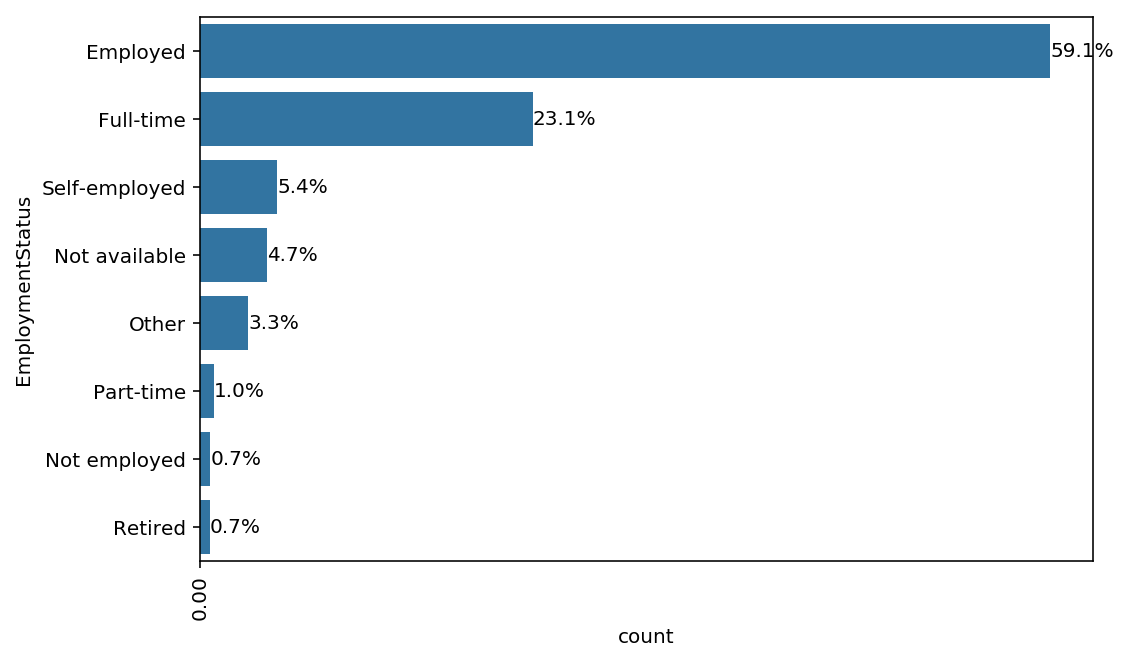

In [11]:
# Setting plot size
plt.figure(figsize = [8, 5])

# Setting color and order
base_color = sb.color_palette()[0]
es_counts = ld['EmploymentStatus'].value_counts()
es_order = es_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(es_counts.shape[0]):
    count = es_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'EmploymentStatus', 
             color = base_color, order = es_order);



 ###### After doing some exploratory analysis of  `EmploymentStatus`:
 - 59.1% of all borrowers are `Employed`
 - 23.1% of all borrowers are `Full-time`
 - 5.4% of all borrowers are `Self-employed`
 - 4.7% of all borrowers are `Not-Available`
 
 
 `Insight`: <font color="#007ff">Around 11% of borrowers don't have a regular income.</font>
 
 `Question`: <font color="#007ff">Is there a difference in loan terms for these 11%? And what is the difference between "Employed" and "Full-time"?</font>
 

##### Define
- Going to use Bar charts to explore qualitative variables: `LoanStatus`

##### Code


In [12]:
# Checking for the different values in the LoanStatus column
ld.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

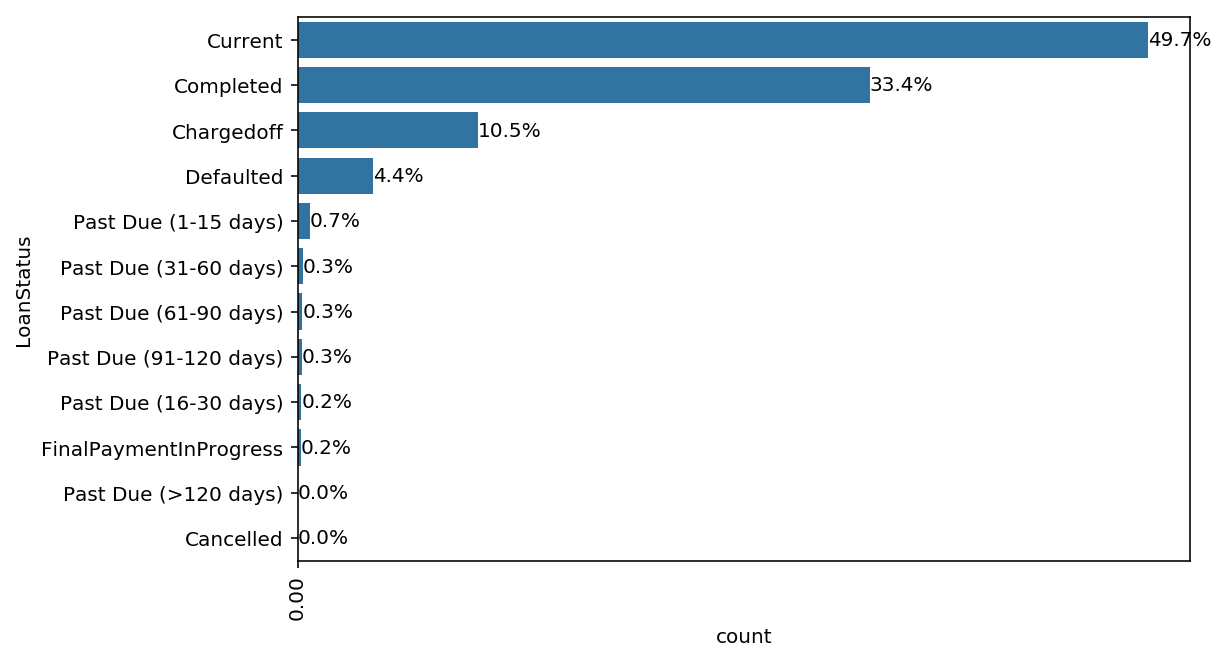

In [13]:
# Setting plot size
plt.figure(figsize = [8, 5])
# Setting color and order
base_color = sb.color_palette()[0]
ls_counts = ld['LoanStatus'].value_counts()
ls_order = ls_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(ls_counts.shape[0]):
    count = ls_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'LoanStatus', 
             color = base_color, order = ls_order);



 ###### After doing some exploratory analysis of `LoanStatus` :
 - Almost 50% of loans are current (paying interest)
 - 33% of all loans are repaid
 - 10.5% are written off (can't be recovered)
 - 4.5% are deliquent
 
 `Insight`: <font color="#007ff">15% of loans are bad business</font>
 
 `Wrangling`: <font color="#007ff">Combine "Past Due" loans with "Default"</font>
 
 `Question`: <font color="#007ff">Are there common characteristics among borrowers or their loan terms, that default?  Are there similarities among borrowers or their loan terms, that repaid?</font>

In [14]:
# Assess the values of 'IncomeVerifiable' column
ld.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

 ###### After doing some exploratory analysis of `IncomeVerifiable` :
 - About 8% of all borrowers can't verify their income 
 
 `Insight`: 8% of borrowers get loans withouth proving their income
 
 `Question`: Are there common characteristics among borrowers or their loan terms, that can't verify income? 

##### Define
- Going to use Barchart to explore quantitative variable: `ListingCategory (numeric)`. Going to rename the variable to: `LoanPurpose`

##### Code


In [15]:
# df.rename(columns={"A": "a", "B": "c"})
ld.rename(columns={'ListingCategory (numeric)': 'LoanPurpose'}, inplace = True)

##### Test

In [16]:
ld.LoanPurpose[3:5]

3    16
4     2
Name: LoanPurpose, dtype: int64

In [17]:
ld.LoanPurpose.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: LoanPurpose, dtype: int64

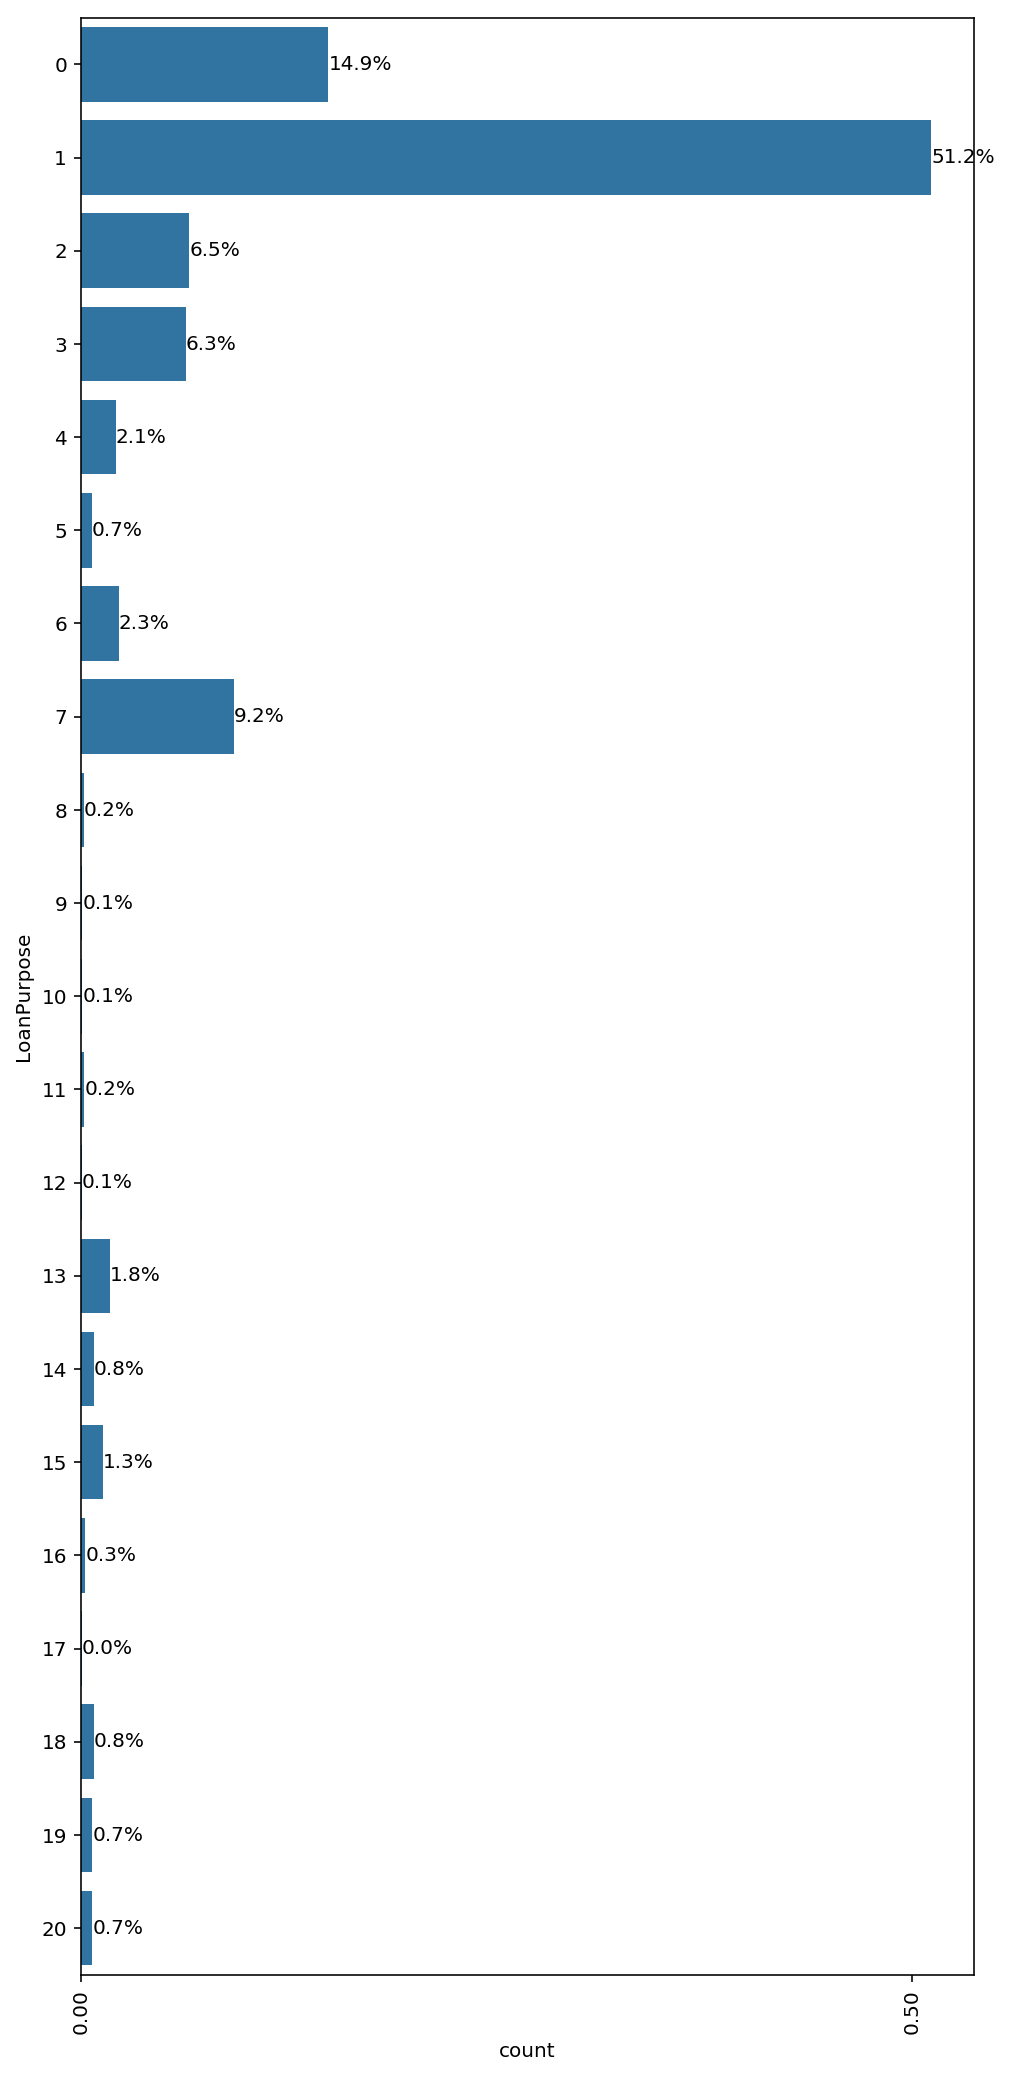

In [18]:
fig = plt.figure(figsize = [8,18])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
lp_counts = ld['LoanPurpose'].value_counts()
lp_order = lp_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanPurpose'].value_counts().max()
max_prop = max_count / n_ld

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(lp_counts.shape[0]):
    count = lp_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'LoanPurpose', 
             color = base_color);


 ###### After doing some exploratory analysis of `LoanPurpose` :
 - 51.2% of all loans have purpose: 1
 - In the second place with 14.9% of all loans have purpose: 0
 - In the third place with 9.2% purpose: 7
 - Purposes: 2 and 3 are in fourth place with 6.5% and 6.3% respectively
 
 `Insight`: Very big gap between pupose 1 and the other purposes.
 
 `Question`: What is purpose 1 and why there is such a big gap?  

##### Define
- Going to use Barchart to explore qualitative variable: `IncomeRange`

##### Code


In [19]:
# Exploring values on the 'IncomeRange' variable
ld.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

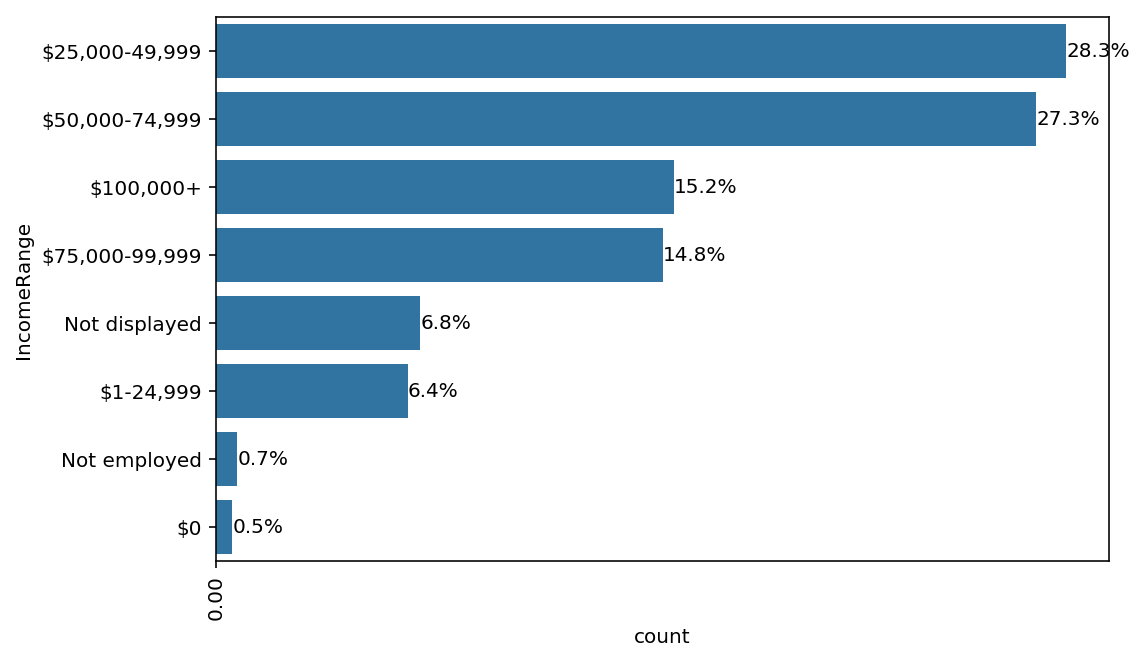

In [20]:
plt.figure(figsize = [8,5])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
ir_counts = ld['IncomeRange'].value_counts()
ir_order = ir_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['IncomeRange'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(ir_counts.shape[0]):
    count = ir_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'IncomeRange', 
             color = base_color, order = ir_order);

 ###### After doing some exploratory analysis of `IncomeRange` :
 - Income ranges: USD 25,000-49,999 and USD 50,000-74,999 make up 28.3% and 27.3% respectively of all loans, and they make up the largest quantities 
 - Income ranges: USD 100,000+ and USD 75,000-99,999 make up 15.2% and 14.8% respectively of all loans.  They second largest quantities.  

 
 `Insight`: Are there differences in the loan parameters between these 2 groups?  Are there any similarities in the loan parameters within the groups? 


### Now we're going to perform 'Univariate Exploration' on the quantitative variables:


##### Define
- Going to use Histograms to explore quantitative variable: `Term`

##### Code


In [21]:
# Exploring the values of the 'Term' variable
ld.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

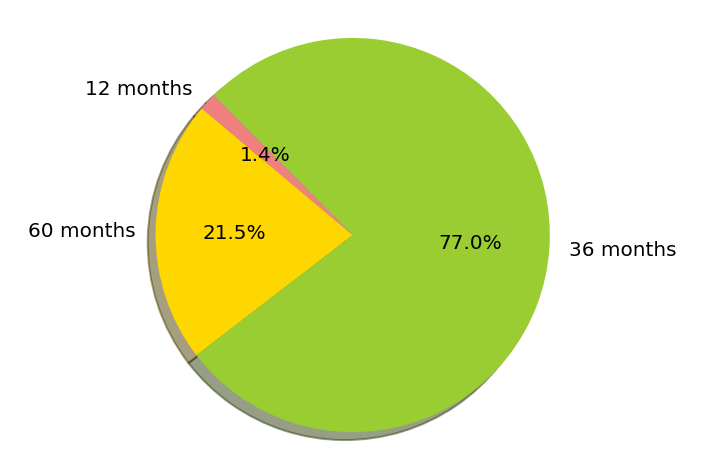

In [22]:
labels = '60 months', '36 months', '12 months'
sizes = [24545, 87778, 1614]
colors = ['gold', 'yellowgreen', 'lightcoral']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

 ###### After doing some exploratory analysis of `Term` :
 - 77% of all loans are taken/given for 3 years
 - 21,5% of all loans are taken/given for 5 years
 - Only 1.4% of all loans are taken/given for one year
 
 `Insight`: Lender specializes on commercial loans with 1yr., 3yr. and 5yr terms.
 `Question`: Any differences between 3yr. and 5yr loans? Any similarities within 3yr and 5yr loans?

##### Define
- Going to use Histograms to explore quantitative variable: `LoanOriginalAmount`

##### Code


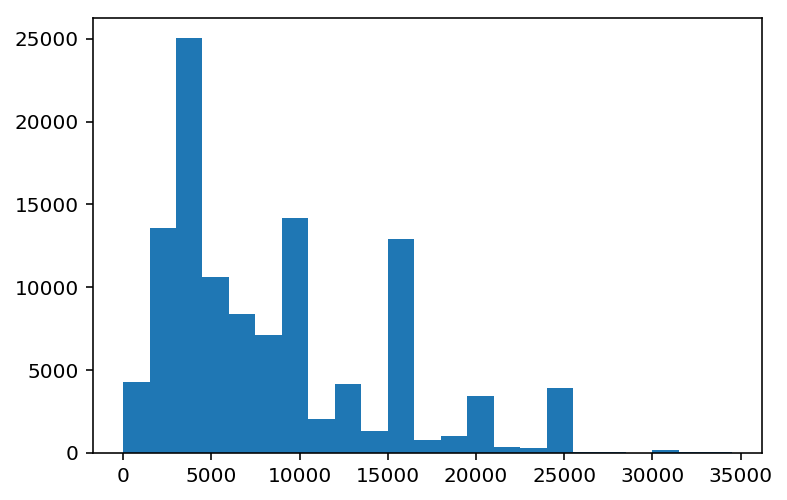

In [23]:
# Plotting LoanOriginalAmount

bins = np.arange(0, ld['LoanOriginalAmount'].max()+1000, 1500)

plt.hist(data = ld, x = "LoanOriginalAmount", bins = bins);

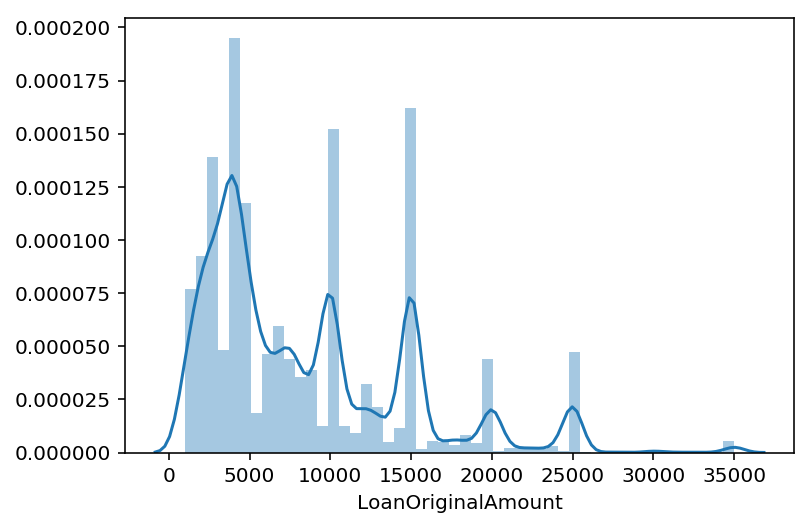

In [24]:
sb.distplot(ld['LoanOriginalAmount']);

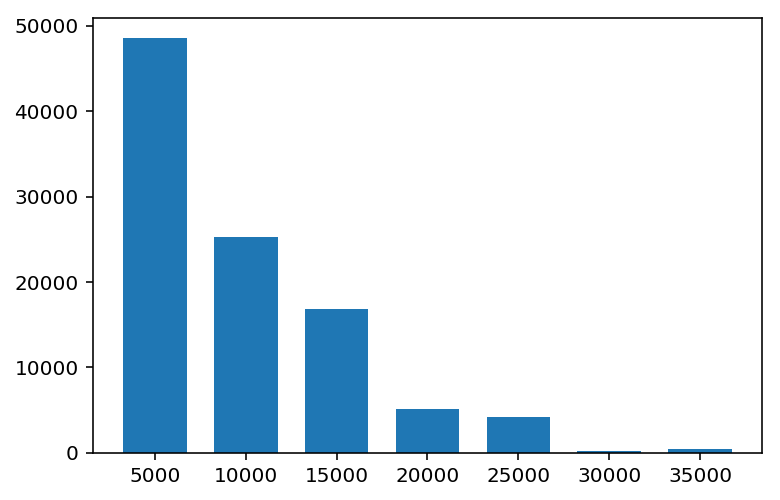

In [25]:
# Organizing the bins for better visualisation
bin_edges = np.arange(2500, 35000+5000, 5000)
plt.hist(ld['LoanOriginalAmount'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(5000, 35000+2500, 5000));

 ###### After doing some exploratory analysis of  `LoanOriginalAmount` :
 - The graph shows that most of the loans are up to USD 5000
 - Graph also shows that most of the loans are taken/given in USD 5000 increments: USD 5K, USD 10000, USD 15000, USD 20000, USD 25000, USD 30000 and USD 35000
 
  `Insight`: Lender specializes on commercial loans with, loan values (LV): USD 5K, USD 10K, USD 20K, USD 25K, USD 30K, and USD 35K
 
 `Question`: Is there a difference or similarities in borrowers and loan terms according to LV?  

##### Define
- Going to use Histograms to explore quantitative variable: `BorrowerAPR`

##### Code


/Users/senkampro/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/senkampro/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


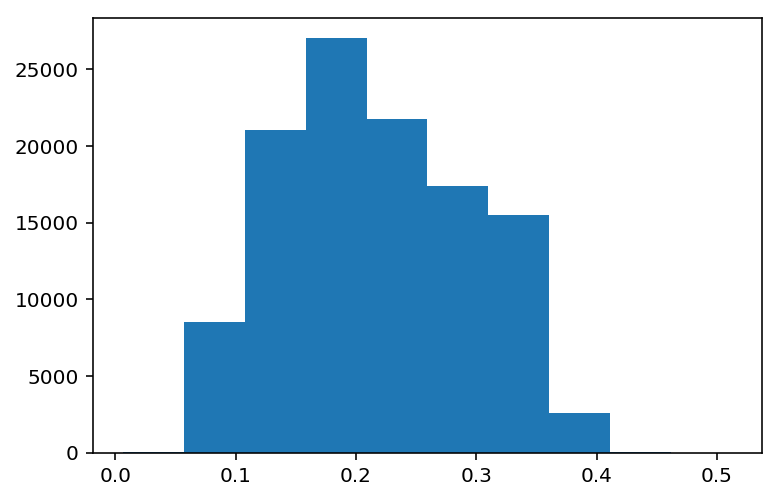

In [26]:
# Plotting histogram with variable 'BorrowerAPR'
plt.hist(data = ld, x = 'BorrowerAPR');

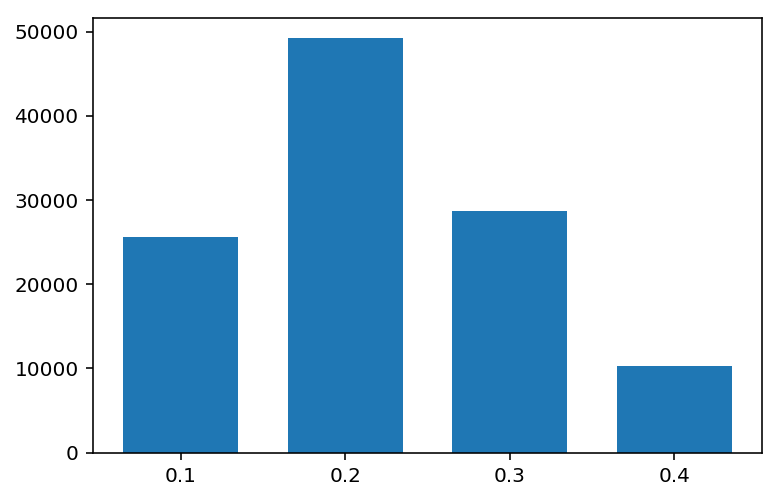

In [27]:
# Organizing the bins for better visualisation
bin_edges = np.arange(0.05, 0.4+0.1, 0.1)
plt.hist(ld['BorrowerAPR'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0.1, 0.4+0.05, 0.1));

 ###### After doing some exploratory analysis of `BorrowerAPR` :
 - The plot shows that most loans are taken/given around 0.2% rate.
 - Loans with 0.1% and with ) 0.3% APR are in second place
 - The least quantity of loans in the portfolio have 0.4% APR.
 
  `Insight`: Quantity of loans with 0.4% is considerably small compared to the other rates.
 
 `Question`: Why is there such a big gap between the loans with 0.4% APR and the other rates, considering that 0.1% difference between rates is not that significant?

##### Define
- Going to use Histograms to explore quantitative variable: `MonthlyLoanPayment`

##### Code


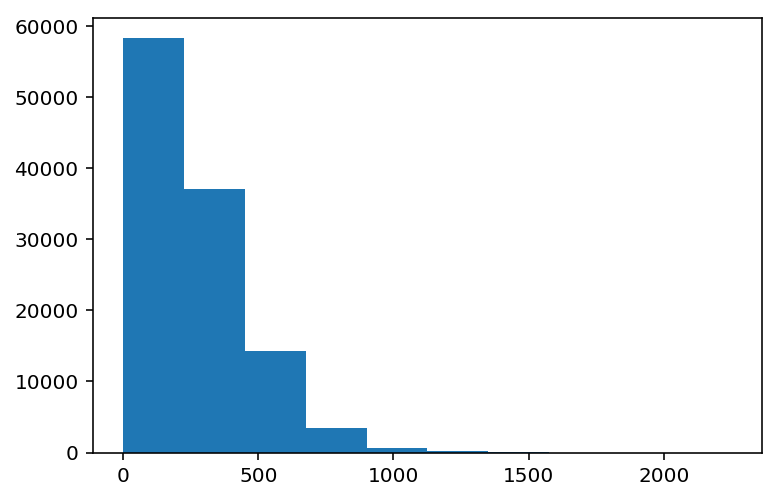

In [28]:
# Plotting histogram with variable 'MonthlyLoanPayment'
plt.hist(data = ld, x = 'MonthlyLoanPayment');

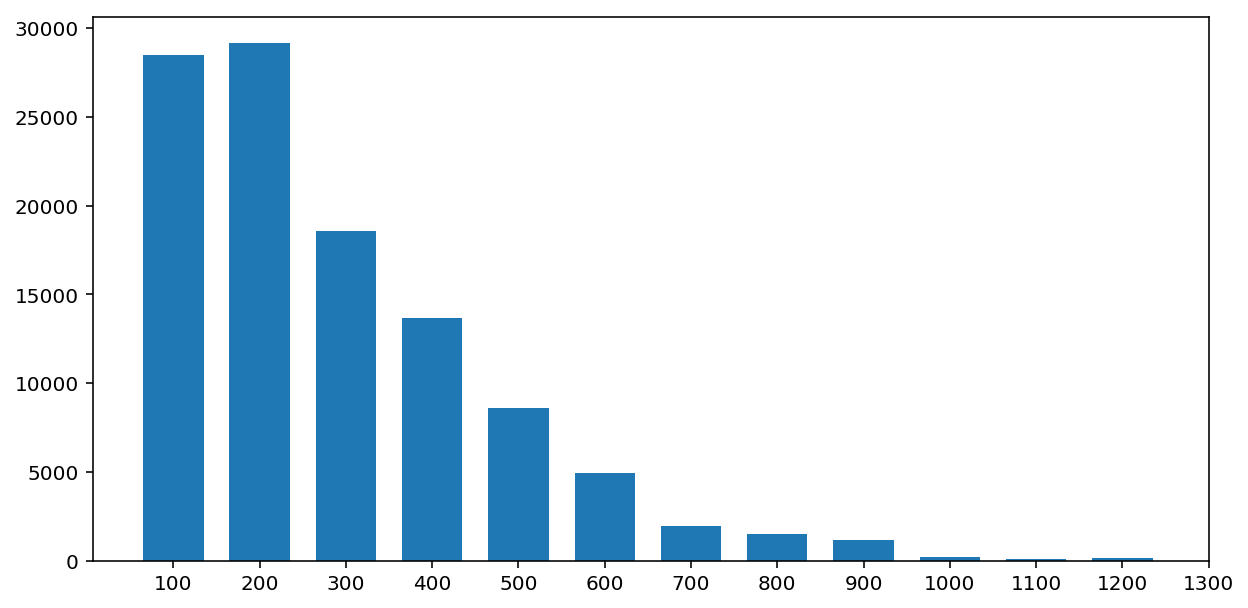

In [29]:
# Organizing the bins for better visualisation
plt.figure(figsize = [10, 5])
bin_edges = np.arange(50, 1250+100, 100)
plt.hist(ld['MonthlyLoanPayment'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(100, 1250+100, 100))
plt.xlabel = 'Monthly payments (in USD)';

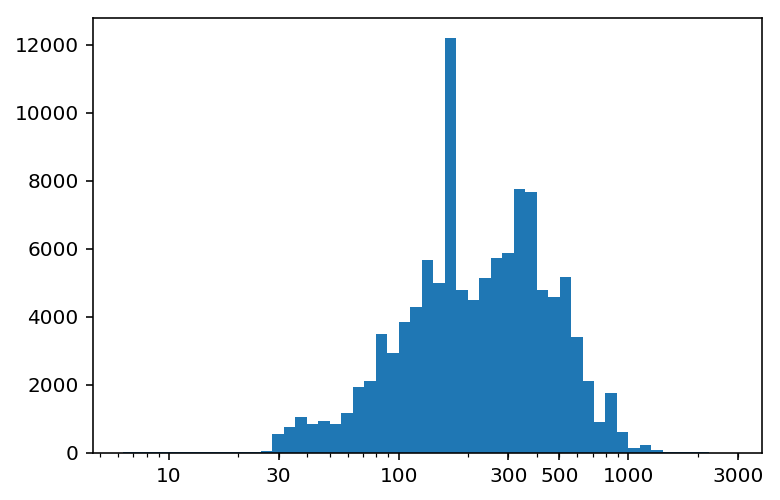

In [30]:
# Converting the xscale and ticks for better readability 
bin_edges = 10 ** np.arange(0.8, np.log10(ld.MonthlyLoanPayment.max())+0.1, 0.05)
plt.hist(ld.MonthlyLoanPayment, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 500, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

 ###### After doing some exploratory analysis of `MonthlyLoanPayment` :
 - The plot shows bimodal distribution with picks at USD 160 and USD 400 monthly payments.
 
  `Insight`: A very large amount of loans is generating over USD 400 mothly payments.   
 
 `Question`: Do smaller payments and therefore smaller loans have less delinquent Loan Statuses?

##### Define
- Going to use Histograms to explore quantitative variable: `EmploymentStatusDuration`

##### Code


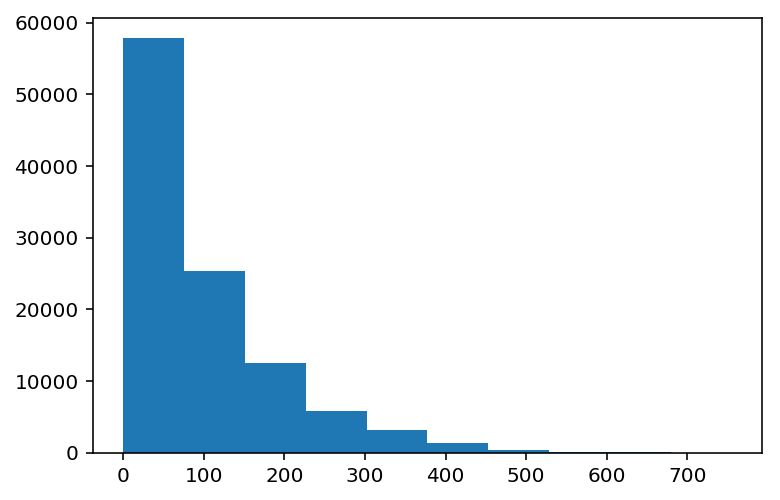

In [31]:
# Plotting histogram with variable 'EmploymentStatusDuration'
plt.hist(data = ld, x = 'EmploymentStatusDuration');

The plot is scewed to the right with a long tail, so we're going to use log scale to make sense of the outliers.

In [32]:
np.log10(ld['EmploymentStatusDuration'].describe())

/Users/senkampro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.026582
mean     1.982595
std      1.975343
min          -inf
25%      1.414973
50%      1.826075
75%      2.136721
max      2.877947
Name: EmploymentStatusDuration, dtype: float64

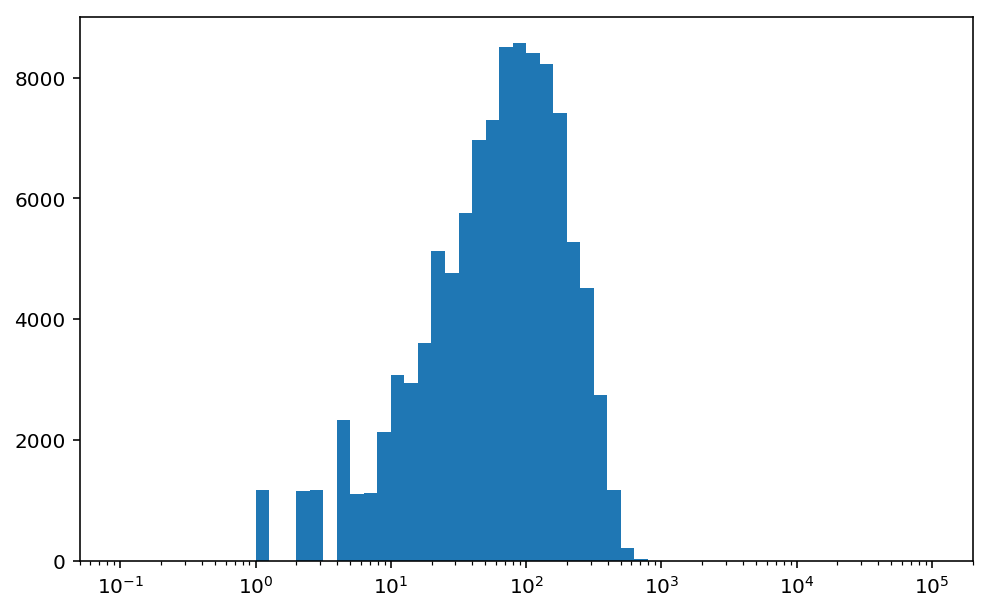

In [33]:
# Plotting the variable on the log scale
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(-1, 5+0.1, 0.1)
plt.hist(data = ld, x = 'EmploymentStatusDuration' , bins = bin_edges)
#plt.xticks(np.arange(12, 504+12, 12));
plt.xscale('log');

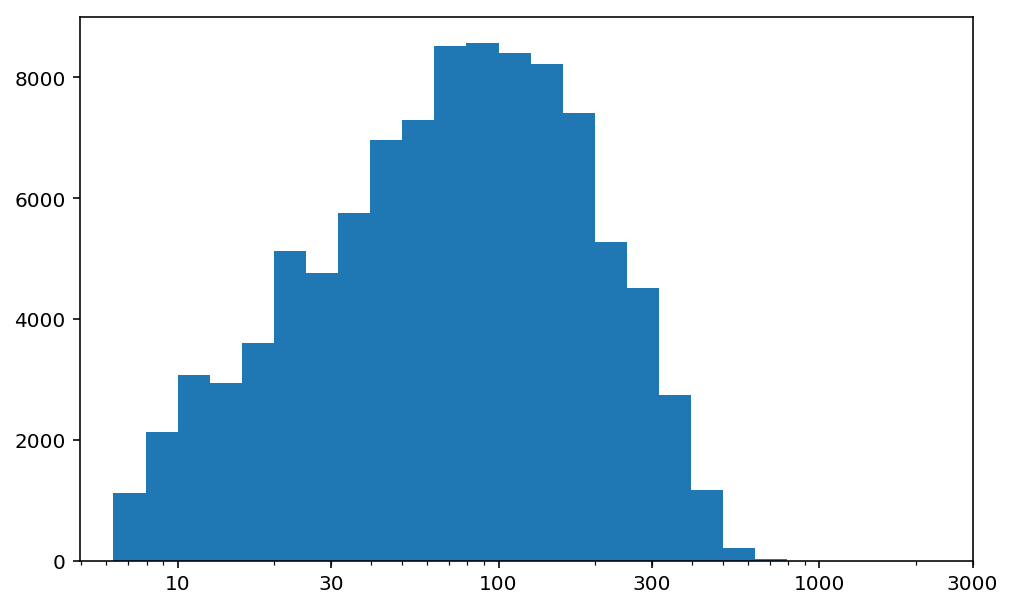

In [34]:
# Converting the xscale and ticks for better readability 
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(0.8, np.log10(ld.EmploymentStatusDuration.max())+0.1, 0.1)
plt.hist(ld.EmploymentStatusDuration, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

 ###### After doing some exploratory analysis of `EmploymentStatusDuration` :
 - The plot shows that most borrowers have: 50 to 200 months or 4 to 16 years of employment history.
 
  `Insight`: Most of the borrowers have a solid employment history.   
 
 `Question`: What are the loan terms for the outliers, especially for those with less than 3 years of employment history?

##### Define
- Going to use Histograms to explore quantitative variable: `DebtToIncomeRatio`

##### Code


In [35]:
ld['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Very unusual value: max = 10; How can a ratio of Debt to Income be 10, that means the debt burden is 10 times higher than income.  How is that possible?

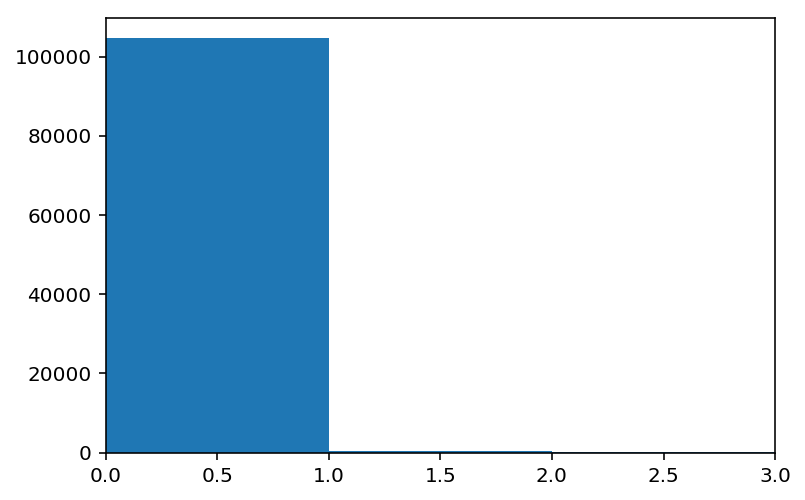

In [36]:
# Plotting histogram with variable 'BorrowerAPR'
plt.hist(data = ld, x = 'DebtToIncomeRatio')
plt.xlim(0, 3);

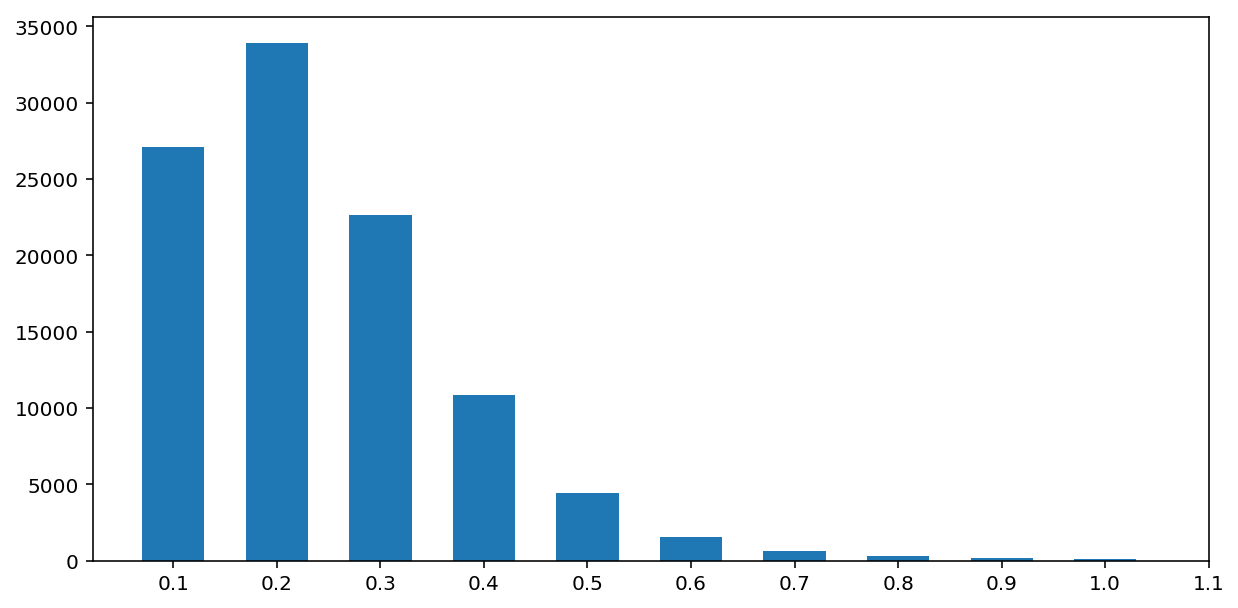

In [37]:
# Organizing the bins for better visualisation
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0.05, 1+0.15, 0.1)
plt.hist(ld['DebtToIncomeRatio'] , bins = bin_edges, rwidth = 0.6)
plt.xticks(np.arange(0.1, 1+0.15, 0.1));

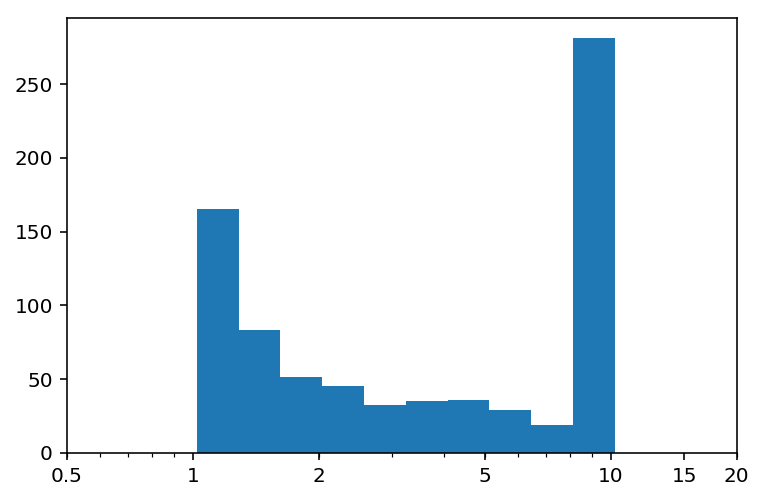

In [38]:
# Converting the xscale and ticks for better readability 
bin_edges = 10 ** np.arange(0.01, np.log10(ld.DebtToIncomeRatio.max())+0.1, 0.1)
plt.hist(ld.DebtToIncomeRatio, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [0.5, 1, 2, 5, 10, 15, 20]
plt.xticks(tick_locs, tick_locs);

 ###### After doing some exploratory analysis of `DebtToIncomeRatio` :
 - The plot shows that most loans have Debt to Income ratio between 0.1 and 0.2.
 
  `Insight`: Very unusual outlier showing a large number of loans with a very high Income to Debt ratio - close to 1   
 
 `Question`: What is this outlier with a ratio of 10?

##### Define
- Going to use Histograms to explore quantitative variable: `StatedMonthlyIncome`

##### Code


In [39]:
# Exploring values of 'StatedMonthlyIncome'
ld.StatedMonthlyIncome

0          3083.333333
1          6125.000000
2          2083.333333
3          2875.000000
4          9583.333333
5          8333.333333
6          2083.333333
7          3355.750000
8          3333.333333
9          3333.333333
10         7500.000000
11         1666.666667
12         2416.666667
13         5833.333333
14        10833.333333
15         5500.000000
16         8291.666667
17         5833.333333
18         6250.000000
19         3075.000000
20         5166.666667
21         3750.000000
22          118.333333
23         2500.000000
24         2333.333333
25         6974.000000
26         3885.916667
27         6666.666667
28         3600.000000
29        10416.666667
              ...     
113907     2166.666667
113908     2833.333333
113909     3333.333333
113910    18756.000000
113911     3333.333333
113912     2500.000000
113913     9750.000000
113914     2400.000000
113915     4416.666667
113916     4583.333333
113917     1916.666667
113918     5583.333333
113919     

In [40]:
ld.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [41]:
# Converting floats to int
# df.col = df.col.astype(int)
ld.StatedMonthlyIncome = ld.StatedMonthlyIncome.astype(int)

In [42]:
# Testing
ld.StatedMonthlyIncome.dtype

dtype('int64')

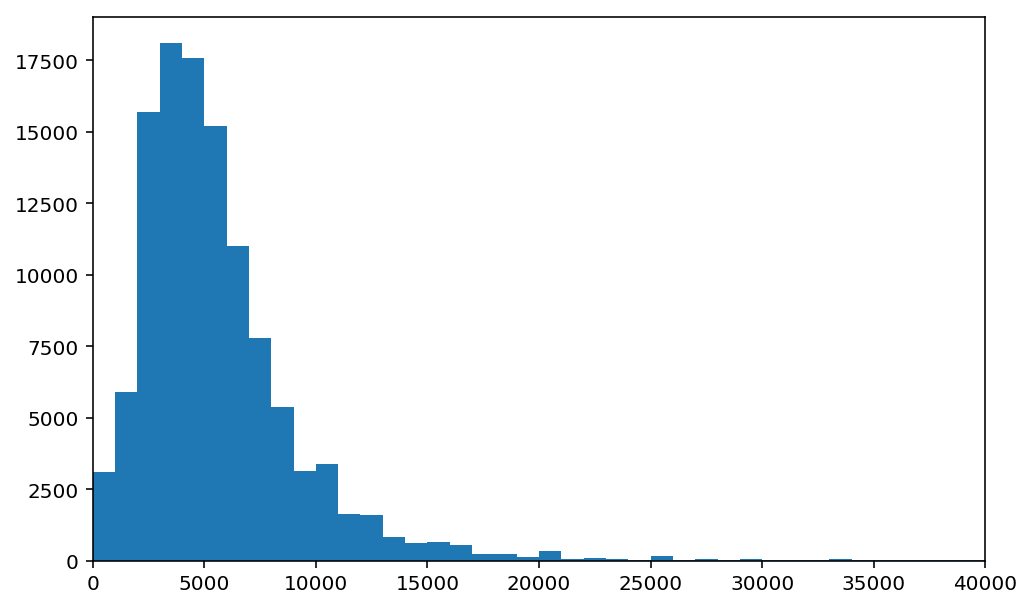

In [43]:
# plotting carat on a standard scale
binsize = 1000
bins = np.arange(0, ld['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ld, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim([0,40000])
plt.show()

Right skewed plot with a long tail.  

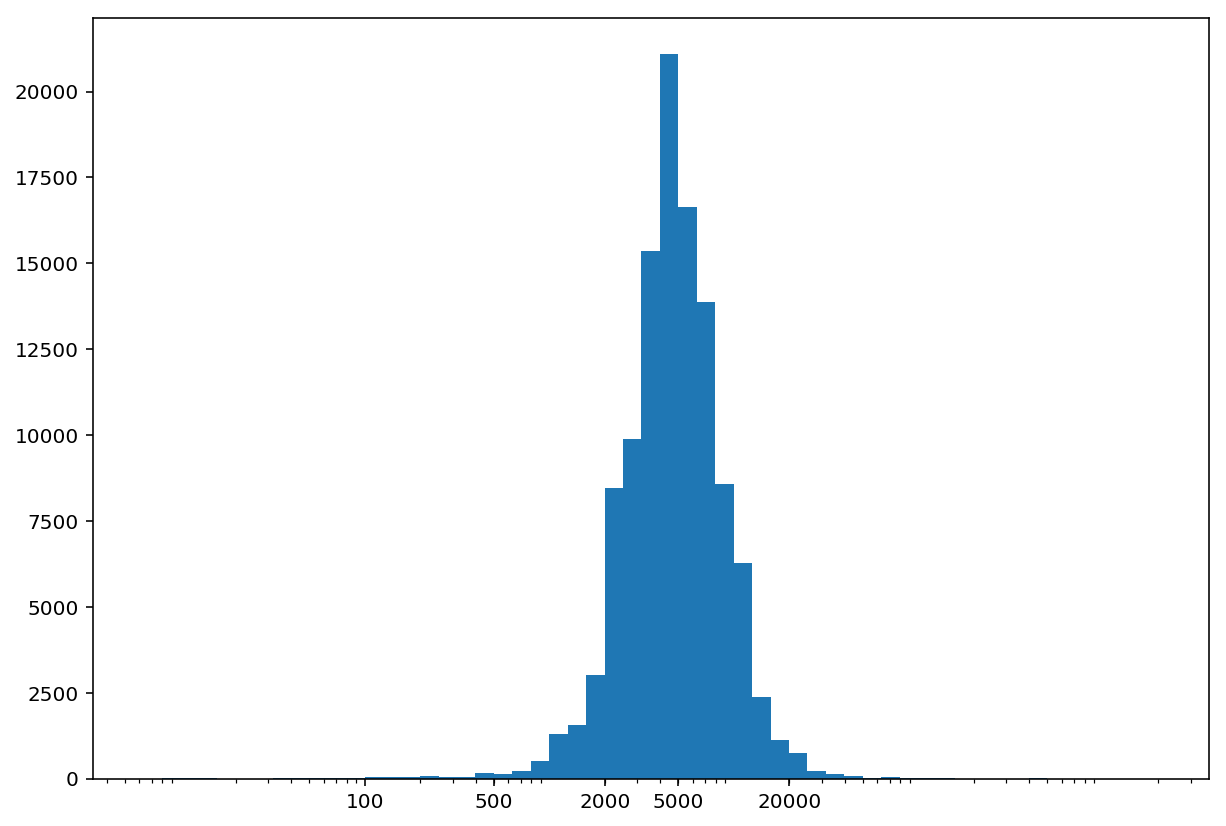

In [44]:
# Converting the xscale and ticks for better readability 
plt.figure(figsize=[10, 7])
bin_edges = 10 ** np.arange(0.8, np.log10(ld.StatedMonthlyIncome.max())+0.1, 0.1)
plt.hist(ld.StatedMonthlyIncome, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [100, 500, 2000, 5000, 20000]
plt.xticks(tick_locs, tick_locs);

 ###### After doing some exploratory analysis of `StatedMonthlyIncome` :
 - The plot shows normal distribution with the mean income at 5000
 
  `Insight`: USD 5000 monthly income for the majority of borrowers corresponds with the findings in the IncomeRange column where the mean annual income falls in the range of USD 25000 - USD 75000.

 ###### After doing some exploratory analysis of  `EmploymentStatus`:
 - 59.1% of all borrowers are `Employed`
 - 23.1% of all borrowers are `Full-time`
 - 5.4% of all borrowers are `Self-employed`
 - 4.7% of all borrowers are `Not-Available`
 
 
 `Insight`: <font color="#007ff">Around 11% of borrowers don't have a regular income.</font>
 
 `Question`: <font color="#007ff">Is there a difference in loan terms for these 11%? And what is the difference between "Employed" and "Full-time"?</font>
 

 ###### After doing some exploratory analysis of `LoanStatus` :
 - Almost 50% of loans are current (paying interest)
 - 33% of all loans are repaid
 - 10.5% are written off (can't be recovered)
 - 4.5% are deliquent
 
 `Insight`: <font color="#007ff">15% of loans are bad business</font>
 
 `Wrangling`: <font color="#007ff">Combine "Past Due" loans with "Default"</font>
 
 `Question`: <font color="#007ff">Are there common characteristics among borrowers or their loan terms, that default?  Are there similarities among borrowers or their loan terms, that repaid?</font>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!









### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!